<a href="https://colab.research.google.com/github/LakshmiL59/Unemployment-analysis-using-python/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Ran

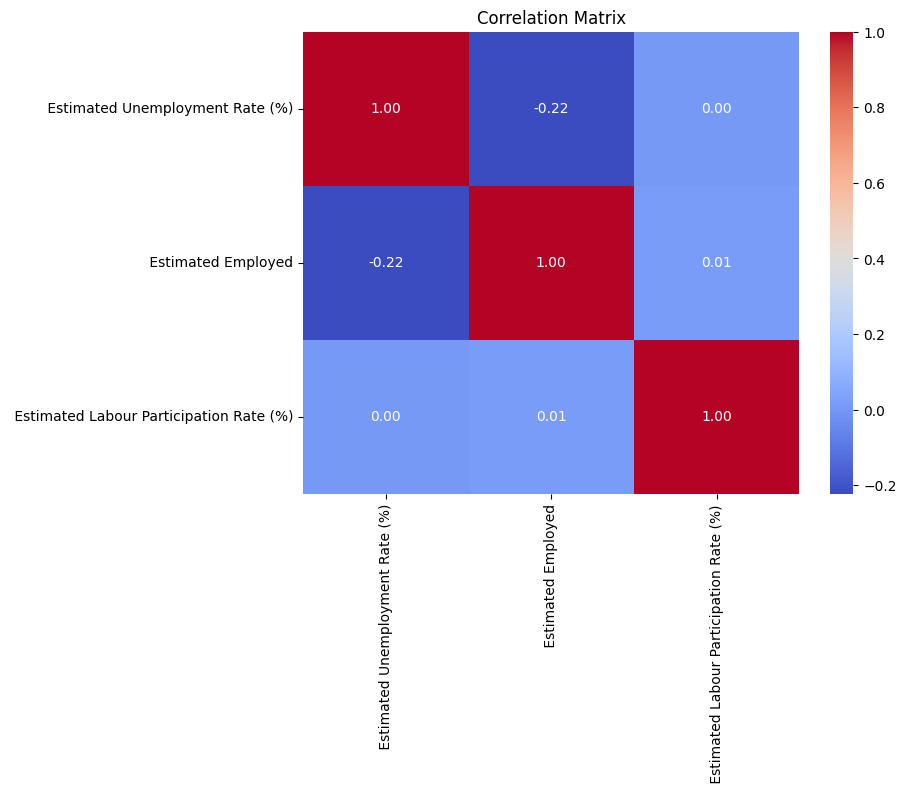

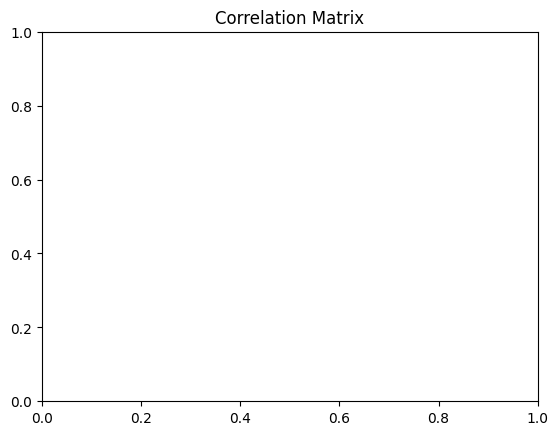


Processed data saved as 'processed_unemployment_data.csv'.


In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 2: Load the Dataset
file_path = '/content/Unemployment in India.csv'  # Adjust if necessary
df = pd.read_csv(file_path)

# Step 3: Explore the Dataset
print("Dataset Overview:")
print(df.head())  # Display first few rows
print("\nDataset Information:")
df.info()  # Dataset structure
print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values

# Step 4: Clean the Data
# Dropping missing values
df = df.dropna()

# If there's a 'Date' column, convert it to datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\nDate column converted to datetime format.")

# Step 5: Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

# Step 6: Analyze the Data
# Calculate the mean unemployment rate
if 'Unemployment Rate' in df.columns:
    print(f"\nAverage Unemployment Rate: {df['Unemployment Rate'].mean():.2f}%")
    print(f"Maximum Unemployment Rate: {df['Unemployment Rate'].max():.2f}%")
    print(f"Minimum Unemployment Rate: {df['Unemployment Rate'].min():.2f}%")

# Step 7: State-wise Analysis (if 'State' column exists)
if 'State' in df.columns:
    statewise_avg = df.groupby('State')['Unemployment Rate'].mean().sort_values()
    print("\nState-wise Average Unemployment Rate:")
    print(statewise_avg)

# Step 8: Visualizations
# Line Plot: Unemployment Rate Over Time
if 'Date' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Unemployment Rate', marker='o')
    plt.title('Unemployment Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate')
    plt.grid(True)
    plt.show()

# Bar Plot: Average Unemployment Rate by State
if 'State' in df.columns:
    plt.figure(figsize=(12, 6))
    statewise_avg.plot(kind='bar', color='skyblue')
    plt.title('Average Unemployment Rate by State')
    plt.xlabel('State')
    plt.ylabel('Unemployment Rate')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

plt.title('Correlation Matrix')
plt.show()

# Interactive Scatter Plot using Plotly
if 'Date' in df.columns and 'State' in df.columns:
    fig = px.scatter(df, x='Date', y='Unemployment Rate', color='State',
                     title='Interactive Unemployment Analysis',
                     labels={'Unemployment Rate': 'Rate (%)', 'Date': 'Date'})
    fig.show()

# Step 9: Save Processed Data
df.to_csv('processed_unemployment_data.csv', index=False)
print("\nProcessed data saved as 'processed_unemployment_data.csv'.")
